# Experiment 4

Uniformly distributed $x_i$.

$$
\begin{align}
f(X) & = A \cdot X[0, m_1) + b + \left(\sum_{i = m_1}^{m_1 + m_2} {\beta_i} + {\alpha_i}_{\chi[t_i, \infty)}(X[i]) \right); \\ 
m_1 & = 4; \\
m_2 & \ge 1; \\
s & = 5; \\
Z & = N(0, \sigma^2).
\end{align}
$$

This is an experiment where $f(X)$ is a linear function of $m_1$ features 
plus step functions of $m_2$ additional features. The features are uniformly
distributed and noise is added to $f$. There are also $s$ confounding variables.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

## Configuration

In [2]:
N = 250

In [3]:
M1 = 2
M2 = list(range(2, 17, 2))

In [4]:
S = 0

In [5]:
SIGMA = 20.0

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [6]:
experiment0 = ise.LinearAndStepWithNoiseExperiment(
    m_linear=M1, m_step=M2[1], s=S, sigma=SIGMA
)

### Generate Impact Charts

In [7]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


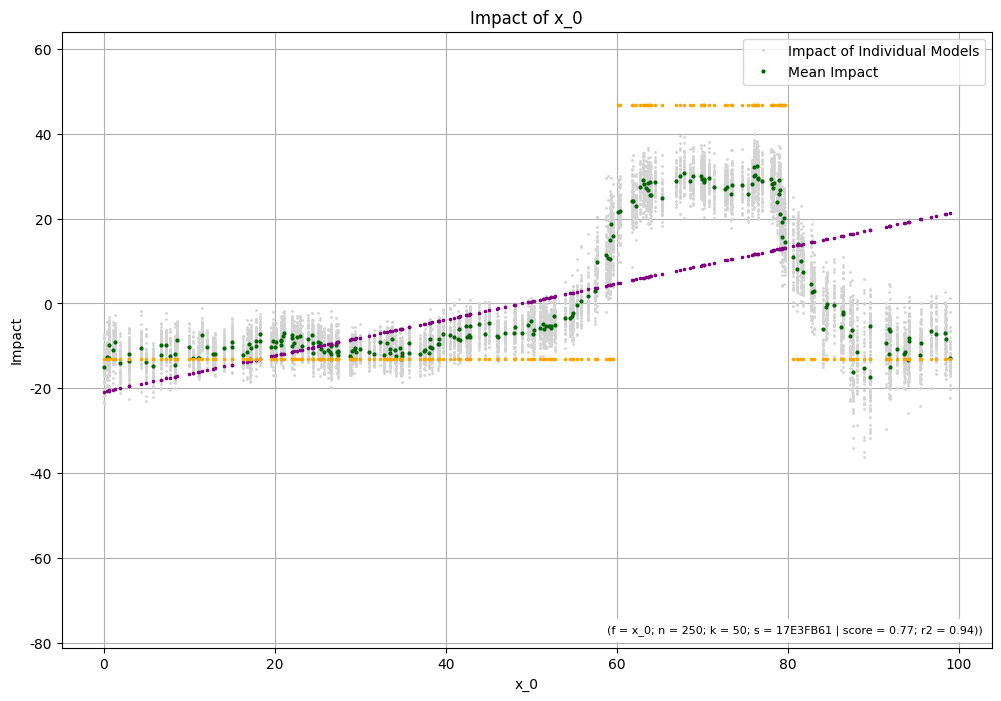

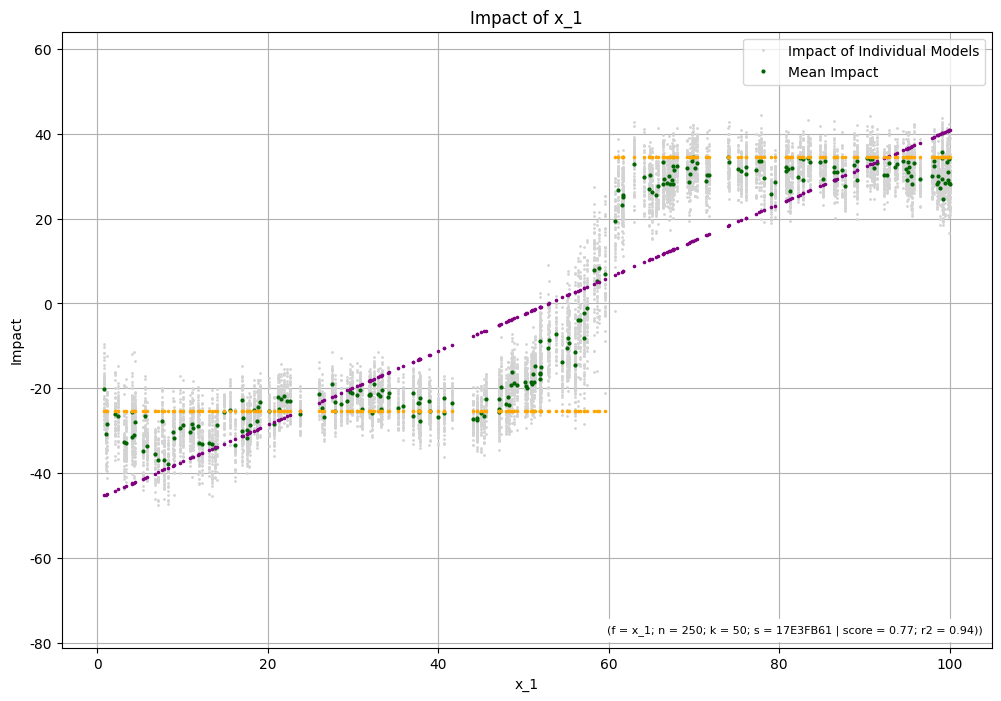

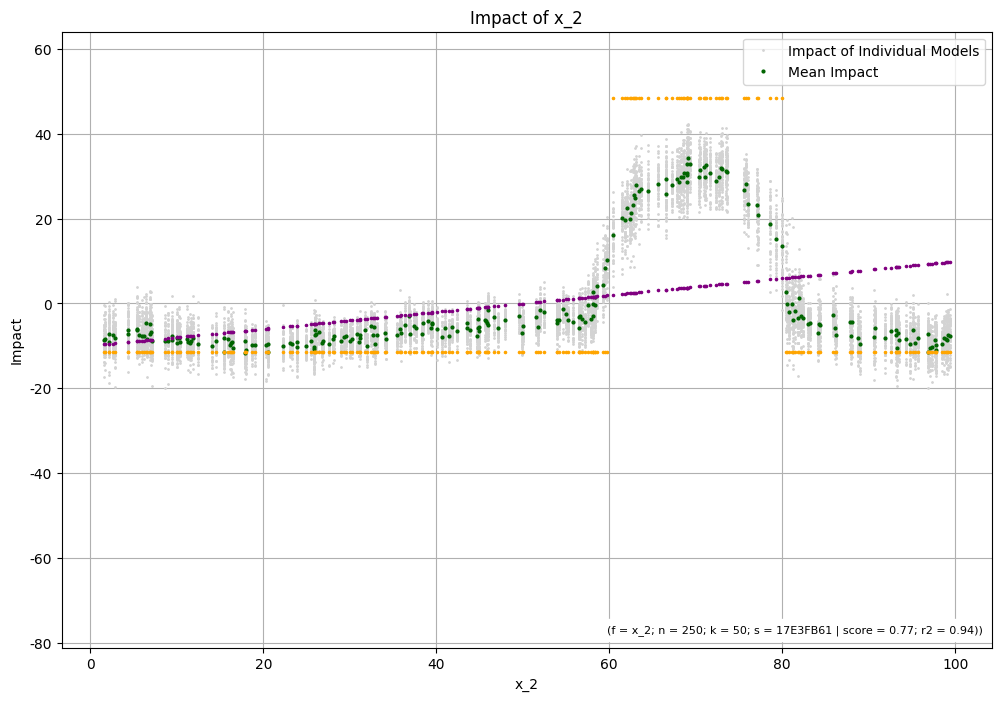

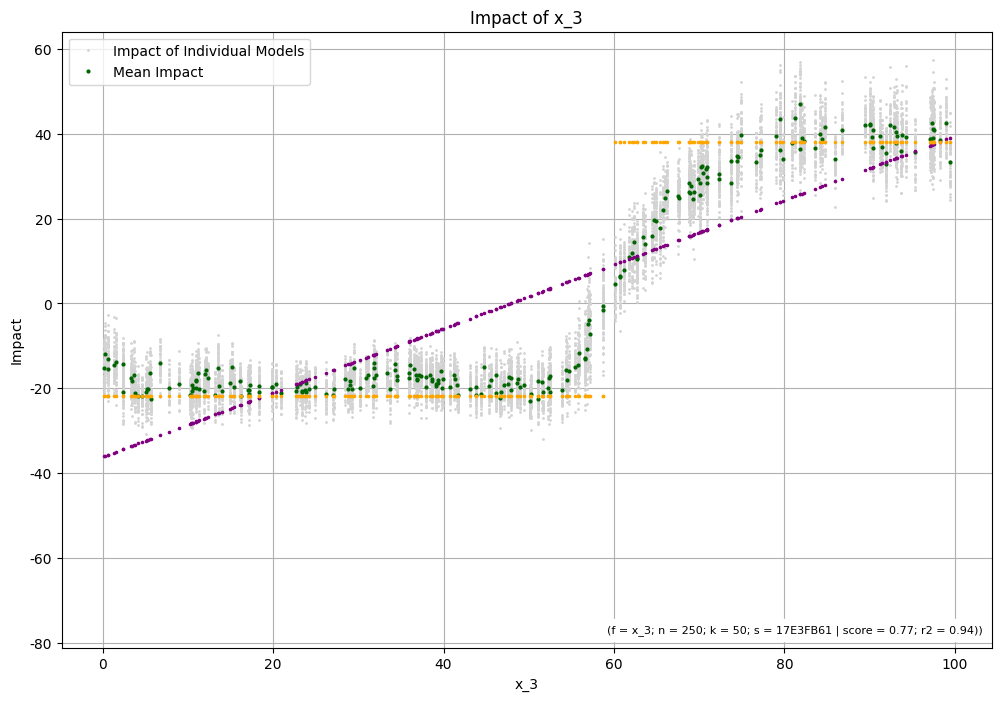

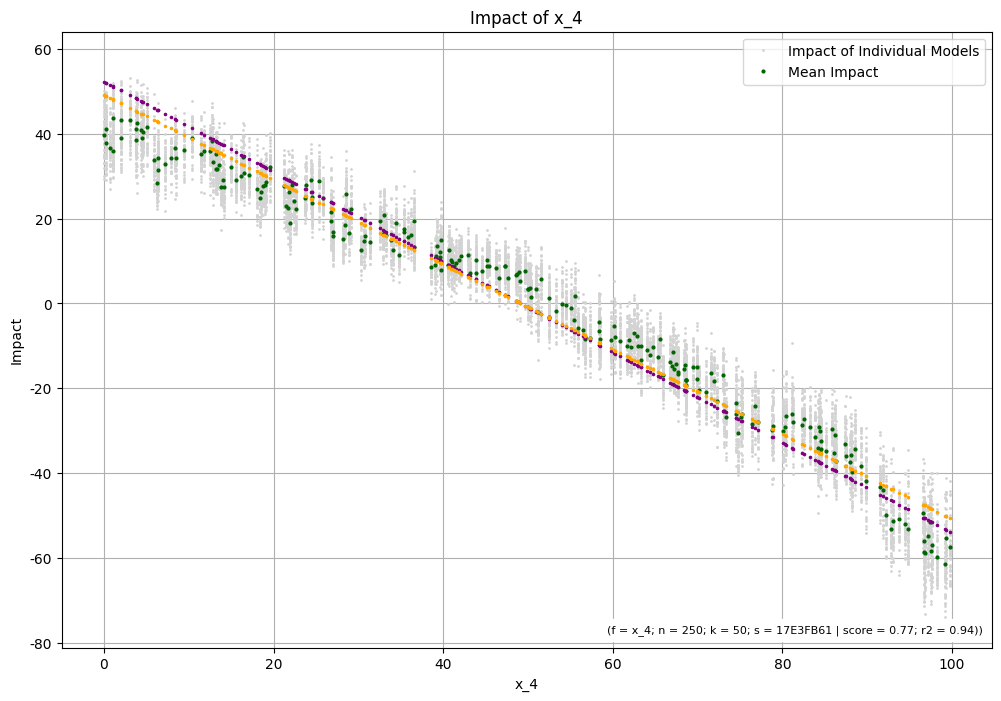

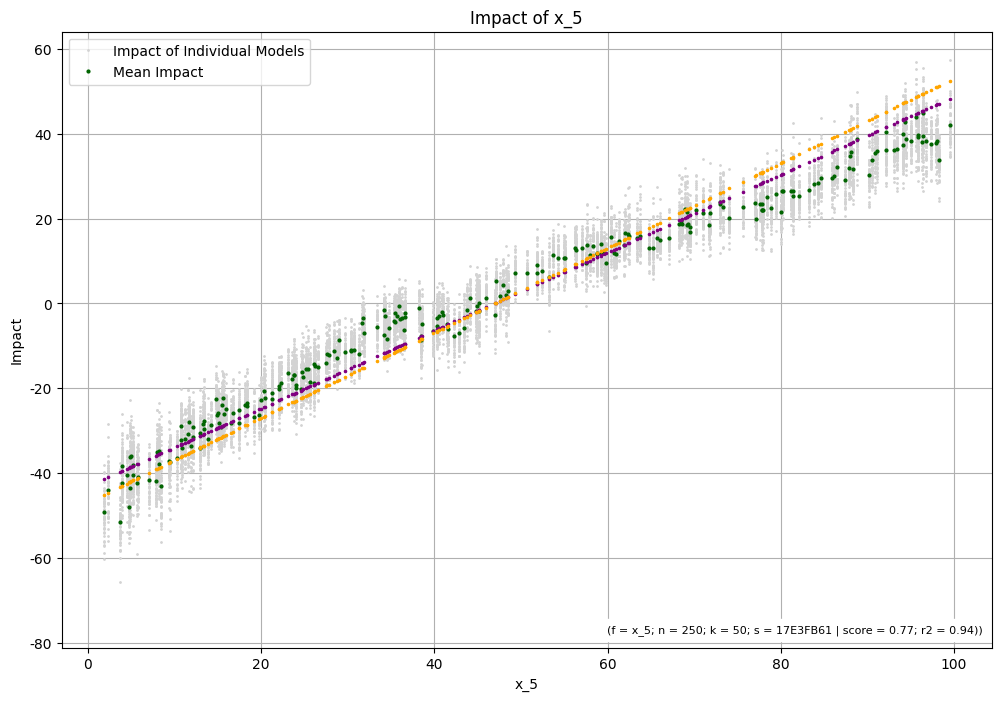

In [8]:
impact_charts = scenario.model_impact_charts(N, linreg_overlay=True)

### Generate Metrics

In [9]:
scenario.model_errors(N, linreg_errors=True)

,metric,x_0,x_1,x_2,x_3,x_4,x_5,mu_x_i
0,RMSE,12.040464,7.619688,11.165442,8.449745,4.809015,5.975727,8.343347
0,MAE,8.903711,5.228798,8.282263,5.552802,3.917879,4.998172,6.147271
0,MED_AE,5.541808,3.916367,5.533601,3.664095,3.567710,4.625005,4.474764
0,LR_RMSE,22.452666,15.654442,22.447384,16.210606,1.832759,2.328716,13.487762
0,LR_MAE,17.518488,13.102728,17.172059,13.770121,1.575796,2.035023,10.862369
0,LR_MED_AE,12.819074,12.008825,11.621288,13.156880,1.532524,2.009570,8.858027


In [10]:
scenario.linreg_r2(N)

0.5931746502598636

## A Multi-Scenario Experiment

In [11]:
experiment = ise.LinearAndStepWithNoiseExperiment(
    m_linear=M1, m_step=M2, s=S, sigma=SIGMA
)

In [12]:
df_model_errors = experiment.model_errors(N, linreg_errors=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


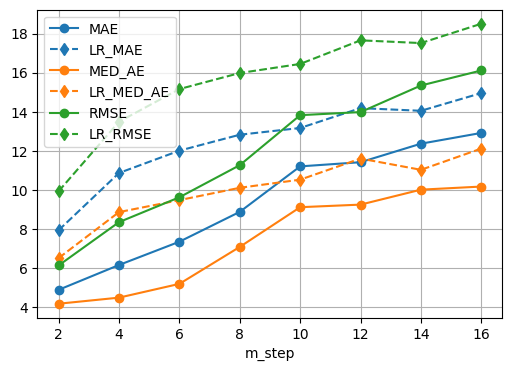

In [14]:
ax = experiment.plot_model_errors(N, x_col="m_step", y_col="mu_x_i", figsize=(6, 4))

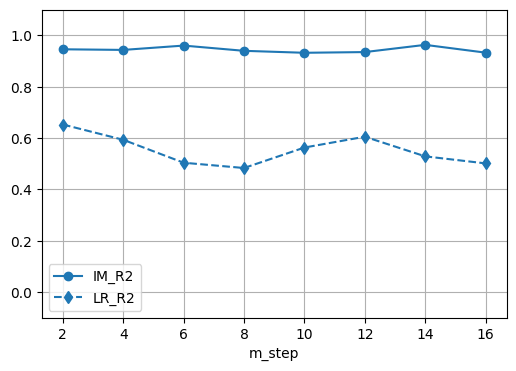

In [16]:
ax = experiment.plot_r2(N, x_col="m_step", figsize=(6, 4))